##### Kaggle dataset import

In [5]:
!pip install ipython-autotime

In [6]:
 pip install -q kaggle

In [7]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kushagra180","key":"c851254106f8a95965aff169fb5ffc98"}'}

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d rohanchreddy/advertsuccess

  0% 0.00/293k [00:00<?, ?B/s]
100% 293k/293k [00:00<00:00, 92.7MB/s]


In [12]:
!unzip "/content/advertsuccess.zip"

Archive:  /content/advertsuccess.zip
  inflating: Test.csv                
  inflating: Train.csv               


# Model

In [299]:
import regex as re
import nltk
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as MSE, r2_score
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [300]:
df = pd.read_csv("/content/Train.csv")

In [301]:
df.head(4)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False


In [302]:
df.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [303]:
df['ratings'].skew()

11.370725992937627

In [304]:
df['ratings'] = np.sqrt(df['ratings'])

In [305]:
df['ratings'].skew()

7.759544441143008

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [307]:
df['genre'].value_counts()

Comedy         22258
Infomercial     2516
Drama            803
Direct           247
Other            224
Name: genre, dtype: int64

In [308]:
df = df.drop(['id'],1)

In [309]:
df_num = df[['average_runtime(minutes_per_week)','ratings']]

In [310]:
df_num.head(2)

,average_runtime(minutes_per_week),ratings
0,45,0.165725
1,45,0.165725


In [311]:
df_text = df.drop(['average_runtime(minutes_per_week)','ratings','netgain'],1)

In [312]:
df_text.head(2)

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
0,Married-spouse-absent,Auto,Comedy,Male,Primetime,United-States,High,No
1,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,No


In [313]:
y = df.netgain

In [314]:
#Using NLP

In [315]:
df_text['main'] = df_text[df_text.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

df_text.main.head(3)

0    Married-spouse-absent,Auto,Comedy,Male,Primeti...
1    Married-civ-spouse,Pharma,Comedy,Male,Primetim...
2    Divorced,Entertainment,Comedy,Female,Primetime...
Name: main, dtype: object

In [316]:
X_text = df_text.main
X_text.head(2)

0    Married-spouse-absent,Auto,Comedy,Male,Primeti...
1    Married-civ-spouse,Pharma,Comedy,Male,Primetim...
Name: main, dtype: object

In [317]:
model = []
for i in range(0, df.shape[0]):
    data = re.sub(r'\W', ' ', str(X_text[i]))
    data = data.lower()
    data = re.sub(r'^br$', ' ', data)
    data = re.sub(r'\s+br\s+',' ',data)
    data = re.sub(r'\s+[a-z]\s+', ' ',data)
    data = re.sub(r'^b\s+', '', data)
    data = re.sub(r'\s+', ' ', data)
    model.append(data)   

In [318]:
model[1]

'married civ spouse pharma comedy male primetime united states low no'

In [319]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [320]:
vector = TfidfVectorizer(max_features = 2000, min_df = 1, max_df = 0.5, stop_words = stopwords.words('english'))
X_text = vector.fit_transform(model).toarray()

In [321]:
X_text

array([[0.8158369 , 0.        , 0.36543781, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.54056066, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [322]:
#creating dummy variable of gender
#dummies1 = pd.get_dummies(df_num['targeted_sex'], prefix = 'targeted_sex',drop_first=True)
#df_num = df_num.drop(['targeted_sex'],1)

In [323]:
#df_num = pd.concat([df_num, dummies1], 1)

In [324]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [325]:
df_num = scaler.fit_transform(df_num,1)
df_num

array([[0.44897959, 0.16572469],
       [0.44897959, 0.16572469],
       [0.44897959, 0.16572469],
       ...,
       [0.24489796, 0.31974042],
       [0.47959184, 0.16572469],
       [0.39795918, 0.16572469]])

In [326]:
X_num = df_num

In [327]:
X = np.concatenate((X_text,X_num),axis = 1)
X

array([[0.8158369 , 0.        , 0.36543781, ..., 0.        , 0.44897959,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.44897959,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.44897959,
        0.16572469],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.24489796,
        0.31974042],
       [0.        , 0.        , 0.54056066, ..., 0.        , 0.47959184,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.39795918,
        0.16572469]])

# Prediction

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
regr = RandomForestClassifier(n_jobs = 4 , random_state=0,n_estimators = 100,verbose = 2)

In [331]:
regr.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100building tree 22 of 100

building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100building tree 27 of 100

building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100building tree 33 of 100

building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.8s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100building tree 73 of 100

building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100building tree 78 of 100

building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=0, verbose=2,
                       warm_start=False)

In [332]:
pred_new = regr.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [333]:
print ("Accuracy of test set",accuracy_score(y_test, pred_new)*100,"%")

Accuracy of test set 80.34548944337811 %


In [334]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [335]:
pred = lr.predict(X_test)
pred1 = lr.predict(X_train)

In [336]:
print ("Accuracy of test set",accuracy_score(y_test, pred)*100,"%")
print ("Accuracy of training set",accuracy_score(y_train, pred1)*100,"%")

Accuracy of test set 81.38195777351248 %
Accuracy of training set 80.69359723584866 %


In [337]:
ns_probs = [0 for _ in range(len(y_test))]

In [338]:
lr_probs = lr.predict_proba(X_test)

In [339]:
 from sklearn.metrics import classification_report

In [340]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.84      0.94      0.88      1985
        True       0.68      0.41      0.51       620

    accuracy                           0.81      2605
   macro avg       0.76      0.67      0.70      2605
weighted avg       0.80      0.81      0.80      2605



In [341]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [342]:
lr_probs = lr_probs[:, 1]

In [343]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [344]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.865


In [345]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

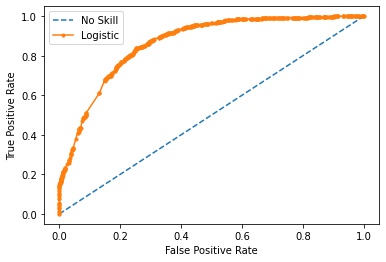

In [346]:
from matplotlib import pyplot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [347]:

import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

In [348]:
param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.03,  
         'num_leaves': 15,
         'max_depth': 15, 
         'min_data_in_leaf': 25, 
         'max_bin': 20, 
         'min_data_in_bin': 3,   
         'num_class': 2,
         'metric': 'multi_logloss'
         }

In [349]:
lgbm = lgb.train(params=param, 
                 train_set=train_data)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [350]:
pred=lgbm.predict(X_test)
pred1=lgbm.predict(X_train)

pred = np.argmax(pred,-1)
pred1 = np.argmax(pred1,-1)

In [351]:
print ("Accuracy of test set",accuracy_score(y_test, pred)*100,"%")
print ("Accuracy of training set",accuracy_score(y_train, pred1)*100,"%")

Accuracy of test set 81.65067178502879 %
Accuracy of training set 81.71309132790172 %


In [352]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.83      0.96      0.89      1985
        True       0.74      0.36      0.48       620

    accuracy                           0.82      2605
   macro avg       0.78      0.66      0.69      2605
weighted avg       0.81      0.82      0.79      2605



In [353]:

from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='dart',num_class=2, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4,
              learning_rate=0.1, max_delta_step=0, bagging_fraction=0.8,bagging_freq=1,max_bin= 255, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, predictor='gpu_predictor')


xgb.fit(X_train,y_train)

XGBClassifier(bagging_fraction=0.8, bagging_freq=1, base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=4, learning_rate=0.1, max_bin=255,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_class=2,
              objective='multi:softmax', predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [354]:
pred = xgb.predict(X_test)
pred1 = xgb.predict(X_train)

#pred = np.argmax(pred,-1)
#pred1 = np.argmax(pred1,-1)

In [355]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.84      0.94      0.89      1985
        True       0.69      0.43      0.53       620

    accuracy                           0.82      2605
   macro avg       0.77      0.68      0.71      2605
weighted avg       0.80      0.82      0.80      2605



# Predicting on Test set

In [356]:
df = pd.read_csv("/content/Test.csv")

In [357]:
df.head(4)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No


In [358]:
df['ratings'].skew()

11.130634282461578

In [359]:
df['ratings'] = np.sqrt(df['ratings'])

In [360]:
df['ratings'].skew()

7.707366907210341

In [361]:
df = df.drop(['id'],1)

In [362]:
df_num = df[['average_runtime(minutes_per_week)','ratings']]

In [363]:
df_num.head(2)

,average_runtime(minutes_per_week),ratings
0,10,0.165725
1,40,0.237196


In [364]:
df_text = df.drop(['average_runtime(minutes_per_week)','ratings'],1)

In [365]:
df_text.head(2)

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
0,Widowed,Auto,Comedy,Female,Daytime,United-States,Low,No
1,Married-civ-spouse,Pharma,Comedy,Male,Morning,United-States,High,Yes


In [366]:
#Using NLP

In [367]:
df_text['main'] = df_text[df_text.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

df_text.main.head(3)

0    Widowed,Auto,Comedy,Female,Daytime,United-Stat...
1    Married-civ-spouse,Pharma,Comedy,Male,Morning,...
2    Divorced,Entertainment,Comedy,Female,Morning,U...
Name: main, dtype: object

In [368]:
X_text = df_text.main
X_text.head(2)

0    Widowed,Auto,Comedy,Female,Daytime,United-Stat...
1    Married-civ-spouse,Pharma,Comedy,Male,Morning,...
Name: main, dtype: object

In [369]:
model = []
for i in range(0, df.shape[0]):
    data = re.sub(r'\W', ' ', str(X_text[i]))
    data = data.lower()
    data = re.sub(r'^br$', ' ', data)
    data = re.sub(r'\s+br\s+',' ',data)
    data = re.sub(r'\s+[a-z]\s+', ' ',data)
    data = re.sub(r'^b\s+', '', data)
    data = re.sub(r'\s+', ' ', data)
    model.append(data)   

In [370]:
model[1]

'married civ spouse pharma comedy male morning united states high yes'

In [371]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [372]:
#vector = TfidfVectorizer(max_features = 2000, min_df = 1, max_df = 0.5, stop_words = stopwords.words('english'))
X_text = vector.transform(model).toarray()

In [373]:
X_text

array([[0.        , 0.        , 0.35749616, ..., 0.        , 0.68052474,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [374]:
df_num = scaler.transform(df_num)
df_num

array([[0.09183673, 0.16572469],
       [0.39795918, 0.23719555],
       [0.5       , 0.16572469],
       ...,
       [0.39795918, 0.16572469],
       [0.39795918, 0.16572469],
       [0.39795918, 0.16572469]])

In [375]:
X_num = df_num

In [376]:
X = np.concatenate((X_text,X_num),axis = 1)
X

array([[0.        , 0.        , 0.35749616, ..., 0.        , 0.09183673,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.39795918,
        0.23719555],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.16572469],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.39795918,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.39795918,
        0.16572469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.39795918,
        0.16572469]])

In [384]:
res = xgb.predict(X)

In [385]:
#res = np.argmax(res,-1)

In [386]:
df_sub = pd.DataFrame(data = res, columns=['netgain'])

In [387]:
df_sub.head()

,netgain
0,False
1,False
2,False
3,False
4,False


In [388]:
df_sub.to_csv("Res.csv",index = False)